In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

## This dataset is intended for link prediction. Every node is either a Facebook page of a restaurant or a well-renowned chef. Edges and the link exists if the FB page liked each other before. Dataset available @ https://networkrepository.com/fb-pages-food.php


In [2]:
nodes = pd.read_csv('fb-pages-food.nodes',sep=',')
nodes

,id,name,new_id
0,402449106435352,Josh Marks,386
1,368969274888,Blue Ribbon Restaurants,473
2,765596333518863,Pat Neely,1
3,136870209668885,La Griglia,542
4,840078802741859,Jose Garces,189
...,...,...,...
615,305811056194084,Jumia Food,163
616,106556872725754,Luke Thomas,381
617,244033175685576,Clodagh McKenna,140
618,119127748110871,Chef Michelle Bernstein,157


In [3]:
edges = pd.read_csv('fb-pages-food.edges',sep=',',header=None)
edges

,0,1
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398
...,...,...
2097,597,611
2098,601,603
2099,601,616
2100,603,616


In [4]:
G = nx.Graph()
G.add_nodes_from(nodes.new_id)

In [5]:
list_of_edges = list(edges.itertuples(index=False,name=None))
G.add_edges_from(list_of_edges)

## Visualizing the network

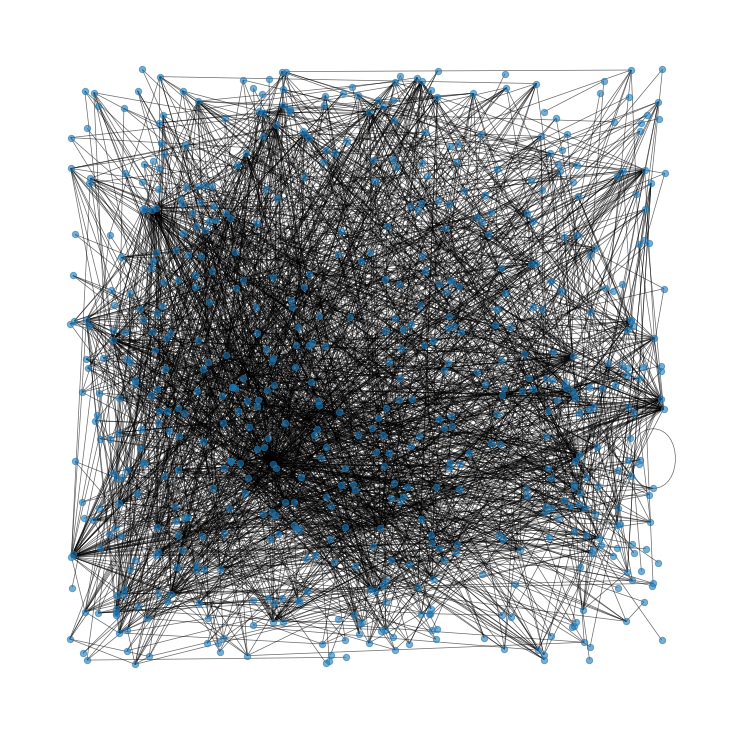

In [6]:
plt.figure(figsize=(10,10))

pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()


### Number of possible combinations follow the formula : n(n-1)/2 for undirected graphs where n = nodes. 
### Order of nodes will not matter. For example Link (1,3) and (3,1) are the same.

In [7]:
edges_list = []
for node_A in range(0,620):
    for node_B in range(0,620):
        if node_A!=node_B:
            edges_list.append((node_A,node_B))
edges = sorted(set(tuple(sorted(t)) for t in edges_list))
len(edges)

191890

In [8]:
n = 620
print(int(n*(n-1)/2))

191890


## Get the degree,common neighbours,Adamic Adar Index ,Preferential Attachment,Jaccard Coefficient and Link for every edge

In [9]:
node_A_degree = [G.degree(edge[0]) for edge in edges]
node_B_degree = [G.degree(edge[1]) for edge in edges]

In [10]:
common_neighbors = [sum(nx.common_neighbors(G,edge[0],edge[1])) for edge in edges]

In [11]:
adamic_adar = []
for u,v,p in nx.adamic_adar_index(G,edges):
    adamic_adar.append(p)

In [12]:
jaccard_coefficient = []
for u,v,p in nx.jaccard_coefficient(G,edges):
    jaccard_coefficient.append(p)

In [13]:
preferential_attachment = []
for u,v,p in nx.preferential_attachment(G,edges):
    preferential_attachment.append(p)

In [14]:
links = [int(G.has_edge(edge[0],edge[1])) for edge in edges]
sum(links)

2091

## Create a dataframe that looks like the dataset in the paper : Link Prediction in Co-authorship Networks Using Scopus Data

In [15]:
data_dict = {"Link Name" : edges,"Node A degree":node_A_degree,"Node B degree":node_B_degree,"Common neighbours":common_neighbors,'Adamic/Adar':adamic_adar,"Jaccard's coefficient":jaccard_coefficient,"Preferential Attachment":preferential_attachment,'Link':links}
df = pd.DataFrame(data_dict)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191890 entries, 0 to 191889
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Link Name                191890 non-null  object 
 1   Node A degree            191890 non-null  int64  
 2   Node B degree            191890 non-null  int64  
 3   Common neighbours        191890 non-null  int64  
 4   Adamic/Adar              191890 non-null  float64
 5   Jaccard's coefficient    191890 non-null  float64
 6   Preferential Attachment  191890 non-null  int64  
 7   Link                     191890 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 11.7+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Node A degree,191890.0,6.959941,9.864732,1.0,2.0,4.0,8.0,134.000000
Node B degree,191890.0,6.601350,9.052805,1.0,2.0,4.0,8.0,134.000000
Common neighbours,191890.0,58.872161,284.233757,0.0,0.0,0.0,0.0,11666.000000
Adamic/Adar,191890.0,0.063443,0.331665,0.0,0.0,0.0,0.0,19.281946
Jaccard's coefficient,191890.0,0.012658,0.054536,0.0,0.0,0.0,0.0,1.000000
Preferential Attachment,191890.0,45.832295,123.642530,1.0,6.0,15.0,42.0,7906.000000
Link,191890.0,0.010897,0.103818,0.0,0.0,0.0,0.0,1.000000


In [18]:
df.Link.value_counts()

0    189799
1      2091
Name: Link, dtype: int64

In [19]:
df.Link.count()

191890

In [20]:
for num,i in enumerate(df.Link.value_counts()):
    print(f'Class {num} : {(i/df.Link.count()*100):.2f}%')
#Extreme class imbalance!

Class 0 : 98.91%
Class 1 : 1.09%


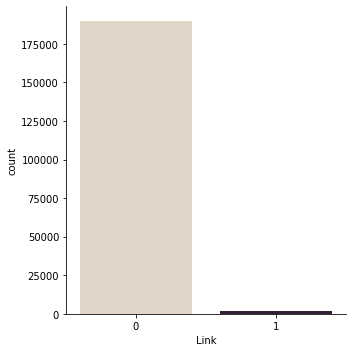

In [21]:
sns.catplot(x="Link", kind="count", palette="ch:.25", data=df)


In [22]:
#sns.pairplot(df)

<AxesSubplot:>

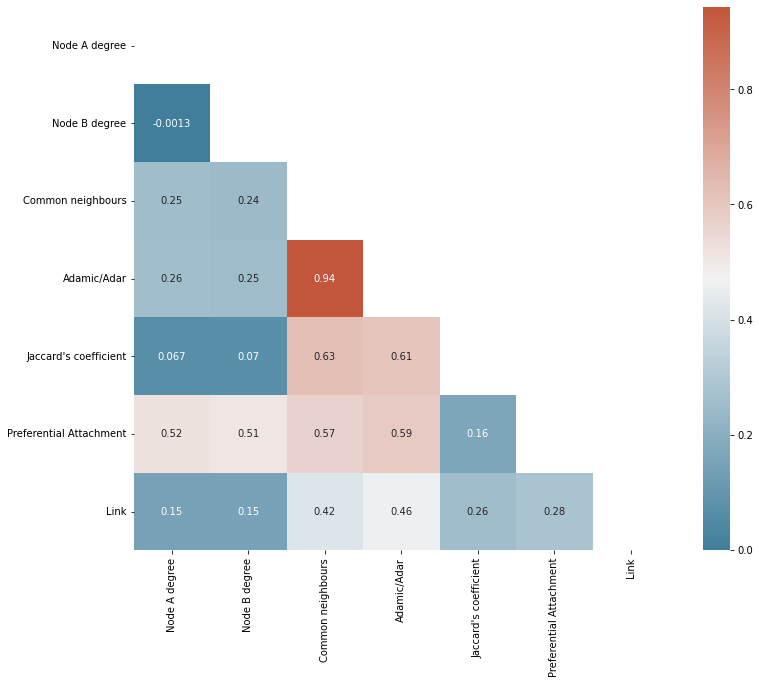

In [23]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Remove nodes with degree less than 5

In [24]:
new_df = df.loc[(df['Node A degree']>4) & (df['Node B degree']>4)]

### Use around the same % of missing edges randomly for balance via Undersampling

In [25]:
new_df.Link.value_counts()

0    38719
1     1467
Name: Link, dtype: int64

In [26]:
from imblearn.under_sampling import RandomUnderSampler

X = new_df.drop(['Link'],axis=1)
y = new_df['Link']
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [27]:
print(y_res.count())
print(y_res.value_counts())

2934
0    1467
1    1467
Name: Link, dtype: int64


In [28]:
X_res.value_counts()

Link Name   Node A degree  Node B degree  Common neighbours  Adamic/Adar  Jaccard's coefficient  Preferential Attachment
(0, 9)      6              28             0                  0.000000     0.000000               168                        1
(229, 361)  31             7              841                0.557128     0.055556               217                        1
(229, 427)  31             5              0                  0.000000     0.000000               155                        1
(229, 436)  31             9              265                0.204172     0.025641               279                        1
(229, 440)  31             5              407                0.497968     0.058824               155                        1
                                                                                                                           ..
(98, 570)   7              14             0                  0.000000     0.000000               98                        

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [30]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA 

#Numeric Transformation Pipeline
numerical_transformer = Pipeline(steps = [
  ('imputer',SimpleImputer(strategy='median')),
  ('scaler',MinMaxScaler()),
    ('PCA', PCA()), 
])

In [31]:
#Separate the numeric data
numerical_data = X.select_dtypes(include=['int64','float64']).columns

In [32]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
                  ('numerical', numerical_transformer,numerical_data)
])

Algorithm : Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       293
           1       0.90      0.81      0.85       294

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587

Algorithm : KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       293
           1       0.86      0.88      0.87       294

    accuracy                           0.87       587
   macro avg       0.87      0.87      0.87       587
weighted avg       0.87      0.87      0.87       587

Algorithm : Support Vector Classification
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       293
           1       0.84      0.91      0.87       294

    accuracy                           0.87       587
   macro avg       0

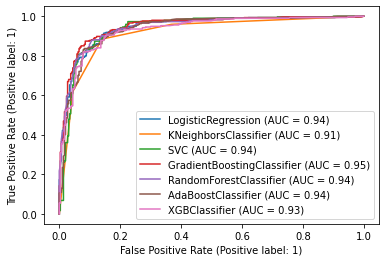

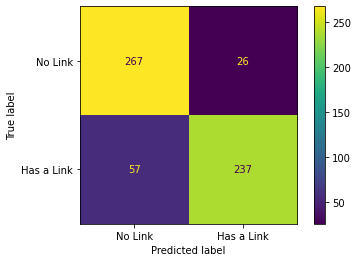

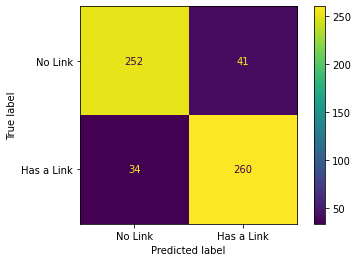

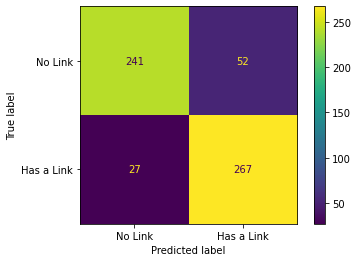

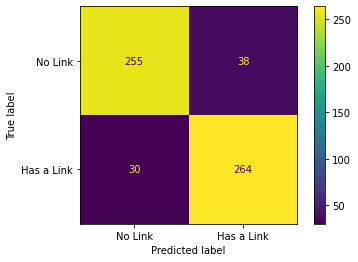

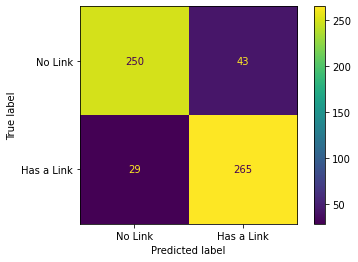

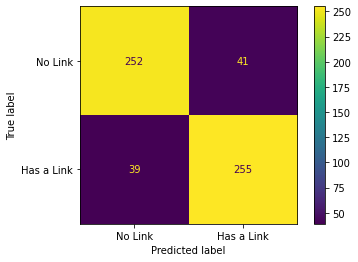

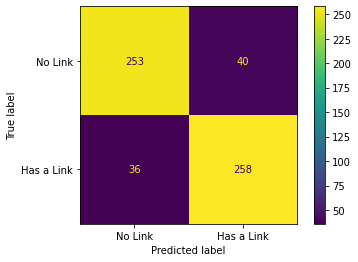

In [33]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


list_of_algorithms = []
list_of_algorithms.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
list_of_algorithms.append(('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3)))
list_of_algorithms.append(('Support Vector Classification', SVC()))
list_of_algorithms.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
list_of_algorithms.append(('Random Forest Classifier', RandomForestClassifier()))
list_of_algorithms.append(('Ada Boost Classifier', AdaBoostClassifier()))
list_of_algorithms.append(('XGBoost Classifier',  xgb.XGBClassifier(objective='binary:logistic',eval_metric='error',use_label_encoder=False ))) 

fig, ax = plt.subplots()

display_labels = ['No Link', 'Has a Link']

for name, algorithm in list_of_algorithms:
    newPipe = Pipeline(steps=[('preprocessor',preprocessor),
                      (name,algorithm)])
    newPipe.fit(X_train, y_train)
    y_pred = newPipe.predict(X_test)
    roc_disp = RocCurveDisplay.from_estimator(newPipe, X_test, y_test, ax=ax, name='{}'.format(algorithm.__class__.__name__))
    print(f'Algorithm : {name}')
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_estimator(newPipe, X_test, y_test,display_labels=display_labels)  
    
plt.show()


### Seems to be performing too well. I think some steps probably need to be revised.

In [34]:
import torch.nn as nn
import torch.nn.functional as F
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [35]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.dense1 = nn.Linear(6,3)
        self.dense2= nn.Linear(3,1)


    def forward(self, x, **kwargs):
        x =self.dense1(x)
        x =self.dense2(x)
        
        return x
        
net = NeuralNetwork().to(device)

In [36]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [37]:
from torch.utils.data import Dataset, DataLoader

class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train.drop('Link Name',axis=1))
X_test = mms.transform(X_test.drop('Link Name',axis=1))

train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [38]:
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [39]:
print(net)

NeuralNetwork(
  (dense1): Linear(in_features=6, out_features=3, bias=True)
  (dense2): Linear(in_features=3, out_features=1, bias=True)
)


In [40]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [41]:
net.train()

for epoch in range(100):  # loop over the dataset multiple times

    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(X_batch)
        loss = criterion(outputs, y_batch.unsqueeze(1))
        acc = binary_acc(outputs, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

        # print statistics
        epoch_acc += acc.item()
        epoch_loss += loss.item()

    print('[Epoch : %d] Loss: %.3f Accuracy: %.1f' % (epoch + 1, epoch_loss,epoch_acc/len(train_loader)))

print('Finished Training')

[Epoch : 1] Loss: 25.232 Accuracy: 81.0
[Epoch : 2] Loss: 25.017 Accuracy: 85.9
[Epoch : 3] Loss: 24.759 Accuracy: 83.4
[Epoch : 4] Loss: 24.446 Accuracy: 85.3
[Epoch : 5] Loss: 24.070 Accuracy: 84.9
[Epoch : 6] Loss: 23.661 Accuracy: 85.1
[Epoch : 7] Loss: 23.201 Accuracy: 85.4
[Epoch : 8] Loss: 22.711 Accuracy: 86.2
[Epoch : 9] Loss: 22.195 Accuracy: 85.6
[Epoch : 10] Loss: 21.671 Accuracy: 85.2
[Epoch : 11] Loss: 21.146 Accuracy: 85.1
[Epoch : 12] Loss: 20.625 Accuracy: 84.7
[Epoch : 13] Loss: 20.142 Accuracy: 84.3
[Epoch : 14] Loss: 19.636 Accuracy: 83.9
[Epoch : 15] Loss: 19.171 Accuracy: 83.7
[Epoch : 16] Loss: 18.773 Accuracy: 83.7
[Epoch : 17] Loss: 18.346 Accuracy: 83.6
[Epoch : 18] Loss: 17.987 Accuracy: 83.6
[Epoch : 19] Loss: 17.655 Accuracy: 83.7
[Epoch : 20] Loss: 17.300 Accuracy: 83.8
[Epoch : 21] Loss: 16.984 Accuracy: 83.7
[Epoch : 22] Loss: 16.733 Accuracy: 83.7
[Epoch : 23] Loss: 16.542 Accuracy: 83.7
[Epoch : 24] Loss: 16.273 Accuracy: 84.0
[Epoch : 25] Loss: 16.065

In [42]:
y_pred_list = []

with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]



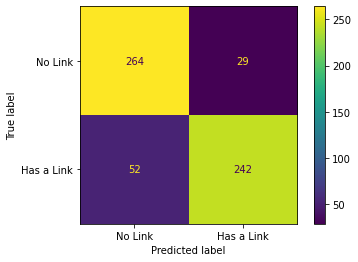

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       293
           1       0.89      0.82      0.86       294

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587



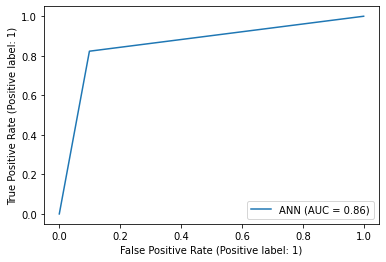

In [43]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_list,display_labels=display_labels)

plt.show()

print(classification_report(y_test, y_pred_list))
roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_list, name='{}'.format('ANN'))


## In the future, I will explore DGL libraries for Graph Neural Network predictions. Thank you!

## -Ash